In [126]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

import csv
import numpy as np
%matplotlib inline

import cv2
import glob
from IPython.display import Image

In [127]:
filename_read = os.path.join("data/HousesInfo.txt")
cols=["Bedrooms","Bathrooms","area","zipcode","price"]
df = pd.read_csv(filename_read , sep=" ", header=None , names=cols)

# Drop rows where housing_price is below 100K or above 900K
df = df[(df['price'] >= 100000) & (df['price'] <= 900000)]
df.head()


,Bedrooms,Bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
6,3,4.0,2544,85262,799000
10,5,5.0,4829,85266,519200


In [128]:
df.shape

(406, 5)

In [129]:
## Bathroom.jpg
new_images=[]
for number in range(1, 536):
    for path in glob.glob("data/Houses dataset/" + str(number) + "_bathroom.jpg"):
        if os.path.isfile(path):
            new_images.append(path) 

In [130]:
img= pd.DataFrame(new_images,columns = ['bathroom_img'])

In [131]:
## bedroom images
bedroom_images = []
for number in range(1, 536):
    for path in glob.glob("data/Houses dataset/" + str(number) + "_bedroom.jpg"):
        if os.path.isfile(path):
            bedroom_images.append(path) 

In [132]:
img['bedroom_img']=bedroom_images

In [133]:
frontal_images = []
for number in range(1, 536):
    for path in glob.glob("data/Houses dataset/" + str(number) + "_frontal.jpg"):
        if os.path.isfile(path):
            frontal_images.append(path) 

In [134]:
img['frontal_img']=frontal_images

In [135]:
kitchen_images = []
for number in range(1, 536):
    for path in glob.glob("data/Houses dataset/" + str(number) + "_kitchen.jpg"):
        if os.path.isfile(path):
            kitchen_images.append(path) 

In [136]:
img['kitchen_img']=kitchen_images

In [137]:
img.head()

,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,data/Houses dataset/1_bathroom.jpg,data/Houses dataset/1_bedroom.jpg,data/Houses dataset/1_frontal.jpg,data/Houses dataset/1_kitchen.jpg
1,data/Houses dataset/2_bathroom.jpg,data/Houses dataset/2_bedroom.jpg,data/Houses dataset/2_frontal.jpg,data/Houses dataset/2_kitchen.jpg
2,data/Houses dataset/3_bathroom.jpg,data/Houses dataset/3_bedroom.jpg,data/Houses dataset/3_frontal.jpg,data/Houses dataset/3_kitchen.jpg
3,data/Houses dataset/4_bathroom.jpg,data/Houses dataset/4_bedroom.jpg,data/Houses dataset/4_frontal.jpg,data/Houses dataset/4_kitchen.jpg
4,data/Houses dataset/5_bathroom.jpg,data/Houses dataset/5_bedroom.jpg,data/Houses dataset/5_frontal.jpg,data/Houses dataset/5_kitchen.jpg


In [138]:
#valid_indices = df.index

df.reset_index(drop=True, inplace=True)  # Reset the index after filtering

# Filter the images_df based on the new indices of df
filtered_images_df = img[img.index.isin(df.index)].reset_index(drop=True)

# At this point, df and filtered_images_df should have matching indices
print("Filtered DataFrame:")
print(df)

print("\nFiltered Images DataFrame:")
print(filtered_images_df)

Filtered DataFrame:
     Bedrooms  Bathrooms  area  zipcode   price
0           4        4.0  4053    85255  869500
1           4        3.0  3343    36372  865200
2           3        4.0  3923    85266  889000
6           3        4.0  2544    85262  799000
10          5        5.0  4829    85266  519200
..        ...        ...   ...      ...     ...
530         5        2.0  2066    94531  399900
531         4        3.5  9536    94531  460000
532         3        2.0  2014    94531  407000
533         4        3.0  2312    94531  419000
534         5        3.0  3796    94531  615000

[406 rows x 5 columns]

Filtered Images DataFrame:
                             bathroom_img  \
0      data/Houses dataset/1_bathroom.jpg   
1      data/Houses dataset/2_bathroom.jpg   
2      data/Houses dataset/3_bathroom.jpg   
3      data/Houses dataset/7_bathroom.jpg   
4     data/Houses dataset/11_bathroom.jpg   
..                                    ...   
401  data/Houses dataset/531_bathroom

In [139]:
images_output=[]
for row_index,row in img.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.bathroom_img)
            image1 = cv2.resize(image_temp1, (64 , 64))
            
            image_temp2 = cv2.imread(row.bedroom_img)
            image2 = cv2.resize(image_temp2, (64 , 64))
            
            image_temp3 = cv2.imread(row.frontal_img)
            image3 = cv2.resize(image_temp3, (64 , 64))
            
            image_temp4 = cv2.imread(row.kitchen_img)
            image4 = cv2.resize(image_temp4, (64 , 64))
              
            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)
            
            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]
            
        
            images_output.append(outputImage)  

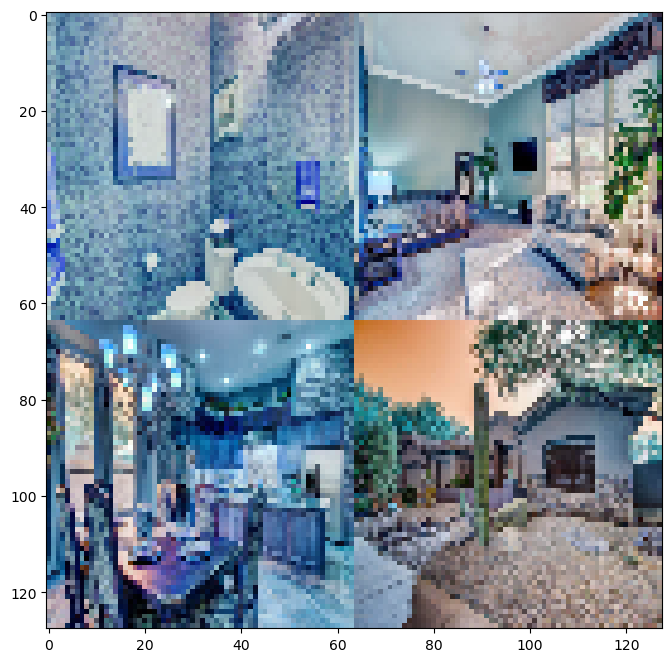

In [140]:
from matplotlib import pyplot as plt

for i in images_output[:1]:
     plt.figure(figsize=(8,8))
     plt.imshow(i, interpolation='nearest')
     plt.show()

In [141]:
img_arr=np.asarray(images_output)
img_arr.shape

(535, 128, 128, 3)

## Next, using functional API, you create DENSE and CNN models to feed text and image to them seperately. 
### TensorFlow Functional API to extract visual, features from house photos and combining them with the house’s textual information
### a novel house price estimation system by using both textual and visual inputs

In [142]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import random
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import os
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        print('CLASS')
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        print('REG')
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Function to plot results
def plot(results):
    fig, ax = plt.subplots(figsize=(10, 6))

    for activation in results['Activation'].unique():
        subset = results[results['Activation'] == activation]
        ax.plot(subset['Neurons'].astype(str), subset['RMSE'], marker='o', label=activation)

    ax.set_title('Model Performance by Activation Function')
    ax.set_xlabel('Layer Configuration (Neurons)')
    ax.set_ylabel('RMSE')
    ax.legend(title='Activation Function')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['pred'].tolist(), label='Prediction', color='orange')
    plt.plot(t['y'].tolist(), label='Expected', color='blue')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)
    return df

# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low
    


In [143]:
# Send the expected numeric and categorical columns to normalization. 
NumericColumns = ['Bedrooms','Bathrooms','price']
CategoricalColumns = ['area', 'zipcode']

for i in NumericColumns:
    encode_numeric_zscore(df,i)
for i in CategoricalColumns:
    encode_text_index(df,i)

df.head()
df.shape

(406, 5)

In [144]:
img_arr.shape


(535, 128, 128, 3)